In [12]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import operator

id_ap_orig_dict = {}

with open('class_scores_orig.txt') as f:
    next(f)
    for line in f:
        items = line.strip('\n').split()
        if items[0] in ['a0_safe', 'a12_semi_nudity', 'a46_occupation', 'a58_hobbies', 'a59_sports', 'a64_rel_personal', 'a65_rel_social']:
        #         if items[0] in ['a0_safe', 'a2_weight_approx', 'a3_height_approx', 'a4_gender', 'a5_eye_color', 'a6_hair_color', 
        #                         'a9_face_complete', 'a10_face_partial', 'a12_semi_nudity', 'a16_race', 'a17_color', 'a46_occupation',
        #                         'a58_hobbies', 'a59_sports', 'a64_rel_personal', 'a65_rel_social']:
            attr_id = items[0]
            ap = items[-1]
            id_ap_orig_dict[attr_id] = ap
id_ap_orig_dict = sorted(id_ap_orig_dict.items(), key=operator.itemgetter(1), reverse=True)
print(id_ap_orig_dict)
attr_id_ordered = [k for k, v in id_ap_orig_dict]

[('a0_safe', '94.31248228292966'), ('a12_semi_nudity', '57.965512906789684'), ('a59_sports', '54.48272477103604'), ('a46_occupation', '42.83809267532948'), ('a65_rel_social', '32.00795084681299'), ('a64_rel_personal', '18.35363328838978'), ('a58_hobbies', '15.935649323118575')]


In [16]:
id_ap_adv_R4_dict = {}

with open('class_scores_adv_R4_7.txt') as f:
    next(f)
    for line in f:
        items = line.strip('\n').split()
        if items[0] in ['a0_safe', 'a12_semi_nudity', 'a46_occupation', 'a58_hobbies', 'a59_sports', 'a64_rel_personal', 'a65_rel_social']:
#         if items[0] in ['a0_safe', 'a2_weight_approx', 'a3_height_approx', 'a4_gender', 'a5_eye_color', 'a6_hair_color', 
#                         'a9_face_complete', 'a10_face_partial', 'a12_semi_nudity', 'a16_race', 'a17_color', 'a46_occupation',
#                         'a58_hobbies', 'a59_sports', 'a64_rel_personal', 'a65_rel_social']:
            attr_id = items[0]
            ap = items[-1]
            id_ap_adv_R4_dict[attr_id] = ap
        
id_ap_adv_R4_dict = list(id_ap_adv_R4_dict.items())
id_ap_adv_R4_dict.sort(key=lambda x: attr_id_ordered.index(x[0]))

print(id_ap_adv_R4_dict)

[('a0_safe', '89.66336863873832'), ('a12_semi_nudity', '33.87235066463795'), ('a59_sports', '30.539539701999825'), ('a46_occupation', '27.608038357485853'), ('a65_rel_social', '18.381493829565606'), ('a64_rel_personal', '10.204298667103298'), ('a58_hobbies', '3.275134948877149')]


In [6]:
id_ap_adv_NR4_dict = {}

with open('class_scores_adv_NR4.txt') as f:
    next(f)
    for line in f:
        items = line.strip('\n').split()
        if items[0] in ['a0_safe', 'a12_semi_nudity', 'a46_occupation', 'a58_hobbies', 'a59_sports', 'a64_rel_personal', 'a65_rel_social']:
            attr_id = items[0]
            ap = items[-1]
            id_ap_adv_NR4_dict[attr_id] = ap
        
id_ap_adv_NR4_dict = list(id_ap_adv_NR4_dict.items())
id_ap_adv_NR4_dict.sort(key=lambda x: attr_id_ordered.index(x[0]))

print(id_ap_adv_NR4_dict)

[('a0_safe', '91.10740120077341'), ('a12_semi_nudity', '37.35628370732785'), ('a59_sports', '35.087520909474115'), ('a46_occupation', '35.386688480326086'), ('a65_rel_social', '26.518558669188337'), ('a64_rel_personal', '14.840368924126313'), ('a58_hobbies', '11.254047778196064')]


In [17]:
keys = []
values_orig = []
for k, v in id_ap_orig_dict:
    keys.append(k)
    values_orig.append(float(v))
print(keys)
print(np.mean(np.asarray(values_orig)))
values_adv_R4 = []
for k, v in id_ap_adv_R4_dict:
    values_adv_R4.append(float(v))
print(np.mean(np.asarray(values_adv_R4)))
# values_adv_NR4 = []
# for k, v in id_ap_adv_NR4_dict:
#     values_adv_NR4.append(float(v))
# print(np.mean(np.asarray(values_adv_NR4)))

['a0_safe', 'a12_semi_nudity', 'a59_sports', 'a46_occupation', 'a65_rel_social', 'a64_rel_personal', 'a58_hobbies']
45.1280065849
30.5063178298


In [20]:
#def plot_bar(keys, values_orig, values_adv_R4, values_adv_NR4):
def plot_bar(keys, values_orig, values_adv_R4):
    # this is for plotting purpose
    plt.figure(figsize=(80,40))
    index = np.arange(len(keys))
    plt.bar(index, values_orig, width=0.2, color='r',align='center', label='Baseline')
    plt.bar(index+0.2, values_adv_R4, width=0.2, color='b',align='center', label='Resample_M=4')
    #plt.bar(index+0.4, values_adv_NR4, width=0.2, color='g',align='center', label='NoResample_M=4')
    
    plt.xlabel('Attribute ID', fontsize=60)
    plt.ylabel('Average Precision', fontsize=60)
    plt.xticks(index+0.2, keys, fontsize=60, rotation=75)
    plt.yticks(fontsize=60)
    plt.legend( prop={'size': 80})
    plt.title('7 Attributes Prediction AP on VISPR',fontsize=90)
    plt.savefig('pap_vispr_7.png')
    plt.show()

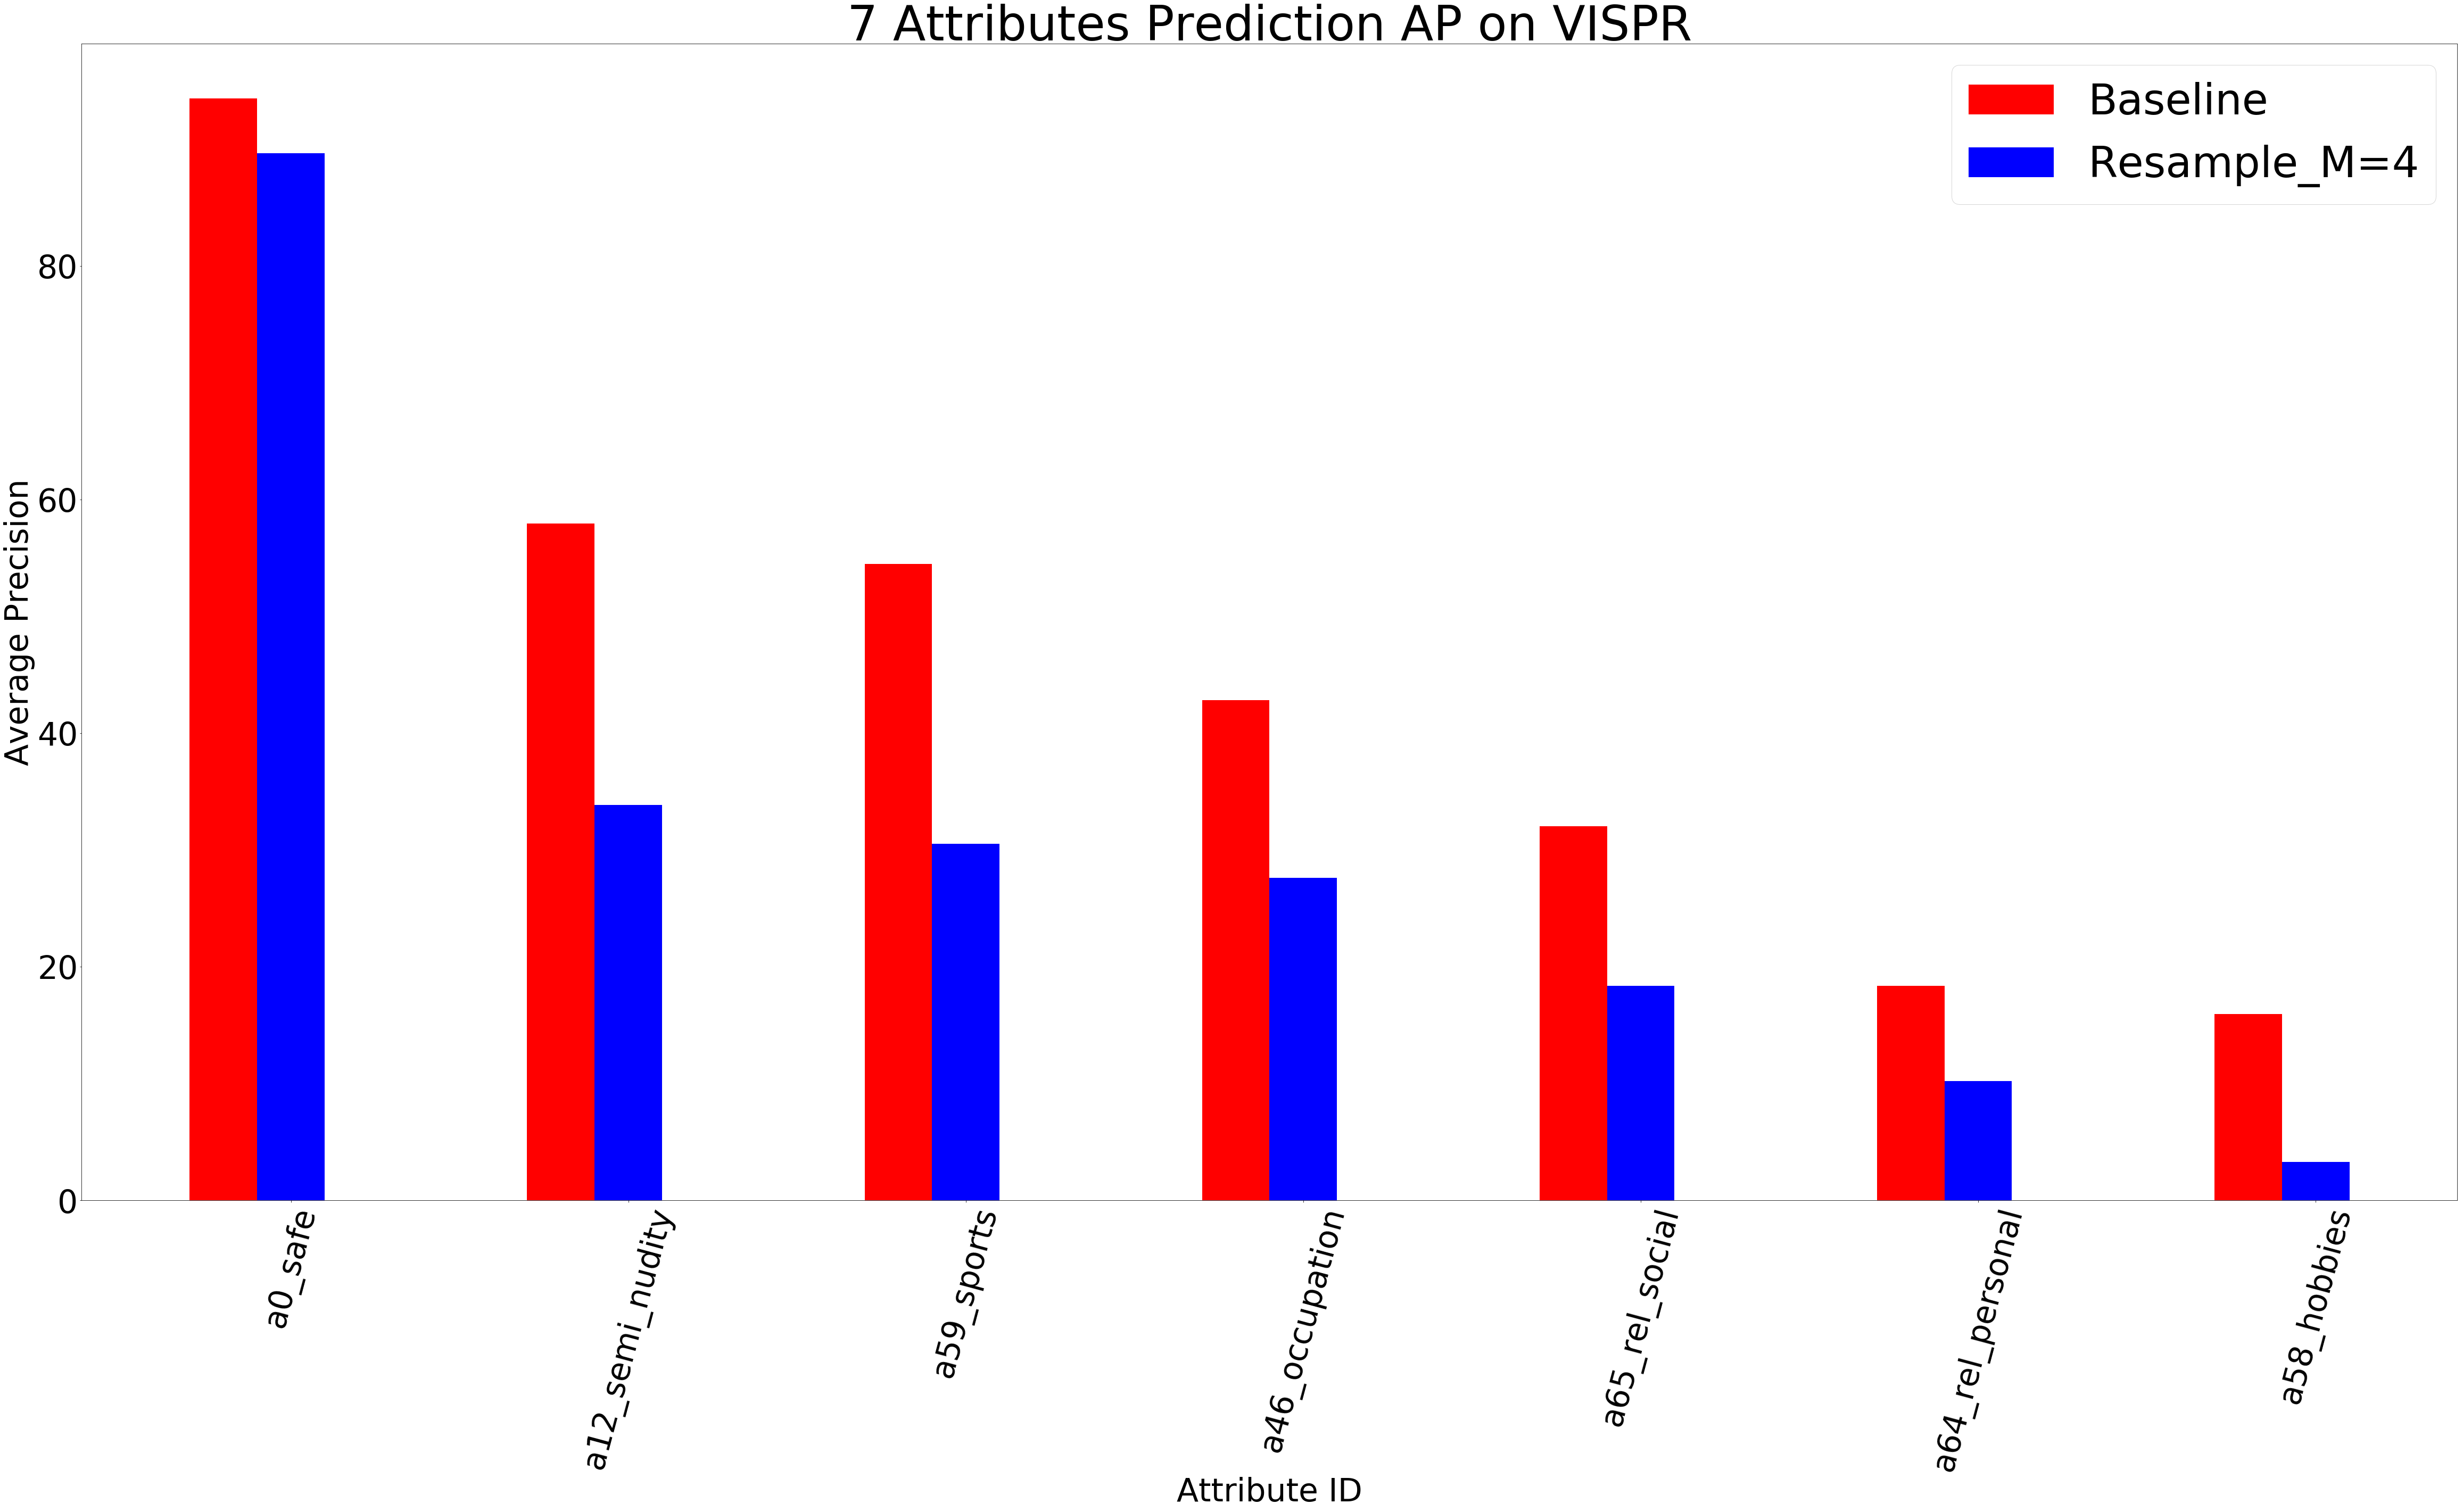

In [21]:
plot_bar(keys, values_orig, values_adv_R4)